In [1]:
import os
os.chdir("../../../")

In [2]:
import torch
from torchts.nn.models.ode import ODESolver
import numpy as np

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
# Duffing equation: Second order ODE system
dt = 0.01

def x_prime(prev_val, coeffs):
    return torch.cos(coeffs["w"]*prev_val["t"])

def t_prime(prev_val, coeffs):
    return 1

ode = {"x": x_prime, "t": t_prime}

# Initial conditions [0,0,0]
ode_init = {"x": 0, "t": 0}

# Constants (Parameters)
ode_coeffs = {"w": 5.}


# 4th Order Runge-Kutta - Data Generation for nt = 1000

In [4]:
ode_solver = ODESolver(
    ode=ode,
    init_vars=ode_init,
    init_coeffs=ode_coeffs,
    dt=dt,
    solver="rk4",
    optimizer=None
)

result = ode_solver(1000)

In [5]:
result

tensor([[ 0.0000,  0.0000],
        [ 0.0100,  0.0100],
        [ 0.0200,  0.0200],
        ...,
        [-0.0806,  9.9701],
        [-0.0713,  9.9801],
        [-0.0619,  9.9901]], grad_fn=<StackBackward>)

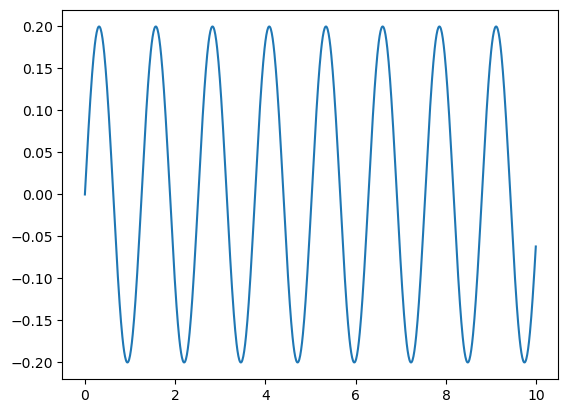

In [6]:
result_np = result.detach().numpy() # Convert to numpy array

# 2D plot of X and Z
plt.plot(result_np[:,1], result_np[:,0])

plt.show()

# Euler's method for training

In [18]:
ode_train_coeffs = {"w": 1.}

ode_solver_train = ODESolver(
    ode=ode,
    init_vars=ode_init,
    init_coeffs=ode_train_coeffs,
    dt=dt,
    solver="euler",
    optimizer=None
)

In [19]:
ode_solver_train.fit_random_sample(
    result,torch.optim.Adam,
    {"lr": 0.5},
    max_epochs=50,
    scheduler=torch.optim.lr_scheduler.MultiStepLR,
    scheduler_params={"milestones": [20],"gamma": 0.2}
)

Epoch: 0	 Loss: tensor(2.4146e-06, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(0.5564, requires_grad=True)}
Epoch: 1	 Loss: tensor(2.7086e-05, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(0.2693, requires_grad=True)}
Epoch: 2	 Loss: tensor(1.7028e-07, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(1.4094, requires_grad=True)}
Epoch: 3	 Loss: tensor(1.5383e-05, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(2.2638, requires_grad=True)}
Epoch: 4	 Loss: tensor(7.2113e-05, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(0.5720, requires_grad=True)}
Epoch: 5	 Loss: tensor(1.9744e-07, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(-2.6869, requires_grad=True)}
Epoch: 6	 Loss: tensor(1.6727e-05, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(-4.4457, requires_grad=True)}
Epoch: 7	 Loss: tensor(1.4529e-05, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(-4.7190, requires_g

In [20]:
ode_solver_train.coeffs

{'w': Parameter containing:
 tensor(-11.3179, requires_grad=True)}

# Predictions for nt=1000

In [21]:
results_test = ode_solver_train(1000)
results_test

tensor([[ 0.0000e+00,  0.0000e+00],
        [ 1.0000e-02,  1.0000e-02],
        [ 1.9936e-02,  2.0000e-02],
        ...,
        [-2.2203e-02,  9.9701e+00],
        [-1.2530e-02,  9.9801e+00],
        [-2.6317e-03,  9.9901e+00]], grad_fn=<StackBackward>)

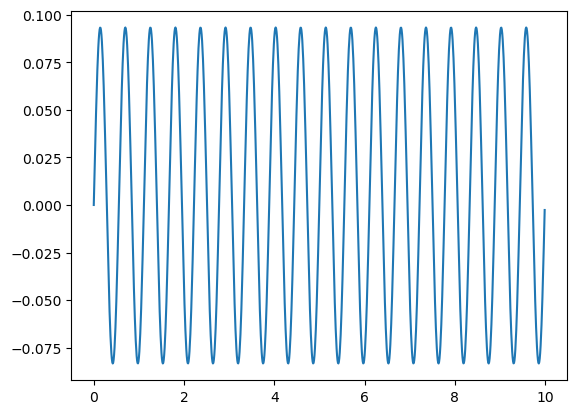

In [22]:
results_test_np = results_test.detach().numpy() # Convert to numpy array

# 2D plot
plt.plot(results_test_np[:,1], results_test_np[:,0])

plt.show()

# Runge-Kutta for training

In [23]:
ode_train_coeffs = {"w": 1.}

ode_solver_train = ODESolver(
    ode=ode,
    init_vars=ode_init,
    init_coeffs=ode_train_coeffs,
    dt=dt,
    solver="rk4",
    optimizer=None
)

In [24]:
ode_solver_train.fit_random_sample(
    result,torch.optim.Adam,
    {"lr": 0.5},
    max_epochs=50,
    scheduler=torch.optim.lr_scheduler.MultiStepLR,
    scheduler_params={"milestones": [20],"gamma": 0.2}
)

Epoch: 0	 Loss: tensor(6.2781e-05, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(-1.2795, requires_grad=True)}
Epoch: 1	 Loss: tensor(0.0001, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(-4.2331, requires_grad=True)}
Epoch: 2	 Loss: tensor(7.5939e-05, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(-5.7381, requires_grad=True)}
Epoch: 3	 Loss: tensor(4.7552e-05, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(-4.1620, requires_grad=True)}
Epoch: 4	 Loss: tensor(0.0002, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(-3.3590, requires_grad=True)}
Epoch: 5	 Loss: tensor(4.9796e-05, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(-1.9073, requires_grad=True)}
Epoch: 6	 Loss: tensor(5.0881e-05, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(0.8073, requires_grad=True)}
Epoch: 7	 Loss: tensor(3.3890e-05, grad_fn=<MseLossBackward>)
{'w': Parameter containing:
tensor(3.7548, requires_grad=T

In [25]:
ode_solver_train.coeffs

{'w': Parameter containing:
 tensor(5., requires_grad=True)}

# Predictions for nt = 1000

In [26]:
results_test = ode_solver_train(1000)
results_test

tensor([[ 0.0000,  0.0000],
        [ 0.0100,  0.0100],
        [ 0.0200,  0.0200],
        ...,
        [-0.0806,  9.9701],
        [-0.0713,  9.9801],
        [-0.0619,  9.9901]], grad_fn=<StackBackward>)

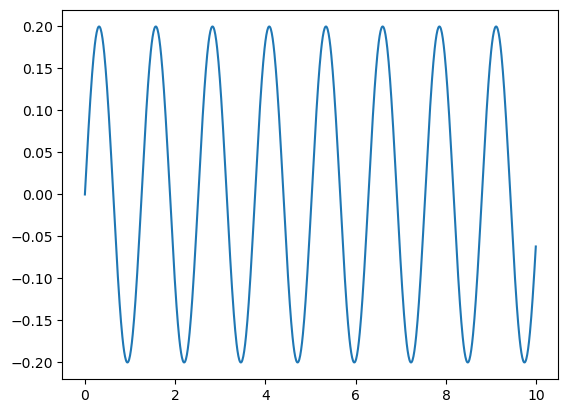

In [27]:
results_test_np = results_test.detach().numpy() # Convert to numpy array

# 2D plot
plt.plot(results_test_np[:,1], results_test_np[:,0])

plt.show()